In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
file = '../data/dataset_diabetes/diabetic_data.csv'
data = pd.read_csv(file)
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [2]:
data.head().T

,0,1,2,3,4
encounter_id,2278392,149190,64410,500364,16680
patient_nbr,8222157,55629189,86047875,82442376,42519267
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50)
weight,?,?,?,?,?
admission_type_id,6,1,1,1,1
discharge_disposition_id,25,1,1,1,1
admission_source_id,1,7,7,7,7
time_in_hospital,1,3,2,2,1


In [3]:
#convert weight to numeric, check
data['weight'] = pd.to_numeric(data['weight'],errors='coerce')
data['weight'].unique()

array([nan])

In [4]:
#No data in weight; encounter_id, 'payer_code' looks useless, drop them
data.drop(columns=['weight','encounter_id','payer_code'],inplace=True)
data.head().T

,0,1,2,3,4
patient_nbr,8222157,55629189,86047875,82442376,42519267
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50)
admission_type_id,6,1,1,1,1
discharge_disposition_id,25,1,1,1,1
admission_source_id,1,7,7,7,7
time_in_hospital,1,3,2,2,1
medical_specialty,Pediatrics-Endocrinology,?,?,?,?
num_lab_procedures,41,59,11,44,51


In [5]:
#msno.matrix(data)
data.nunique()

patient_nbr                 71518
race                            6
gender                          3
age                            10
admission_type_id               8
discharge_disposition_id       26
admission_source_id            17
time_in_hospital               14
medical_specialty              73
num_lab_procedures            118
num_procedures                  7
num_medications                75
number_outpatient              39
number_emergency               33
number_inpatient               21
diag_1                        717
diag_2                        749
diag_3                        790
number_diagnoses               16
max_glu_serum                   4
A1Cresult                       4
metformin                       4
repaglinide                     4
nateglinide                     4
chlorpropamide                  4
glimepiride                     4
acetohexamide                   2
glipizide                       4
glyburide                       4
tolbutamide   

In [6]:
#check gender
data['gender'] = data['gender'].astype('category')
data['gender'].value_counts()


Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [7]:
data.loc[data['gender']=='Unknown/Invalid']=np.NaN
data['gender'].value_counts()

Female             54708
Male               47055
Unknown/Invalid        0
Name: gender, dtype: int64

In [8]:
for col in data.columns:
    data[col].replace('?',np.NaN,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   patient_nbr               101763 non-null  float64 
 1   race                      99492 non-null   object  
 2   gender                    101763 non-null  category
 3   age                       101763 non-null  object  
 4   admission_type_id         101763 non-null  float64 
 5   discharge_disposition_id  101763 non-null  float64 
 6   admission_source_id       101763 non-null  float64 
 7   time_in_hospital          101763 non-null  float64 
 8   medical_specialty         51816 non-null   object  
 9   num_lab_procedures        101763 non-null  float64 
 10  num_procedures            101763 non-null  float64 
 11  num_medications           101763 non-null  float64 
 12  number_outpatient         101763 non-null  float64 
 13  number_emergency          101

In [9]:
#examide and citoglipton hane only one unique value, reomove them
data.drop(columns=['examide','citoglipton','patient_nbr'],inplace=True)

<AxesSubplot:>

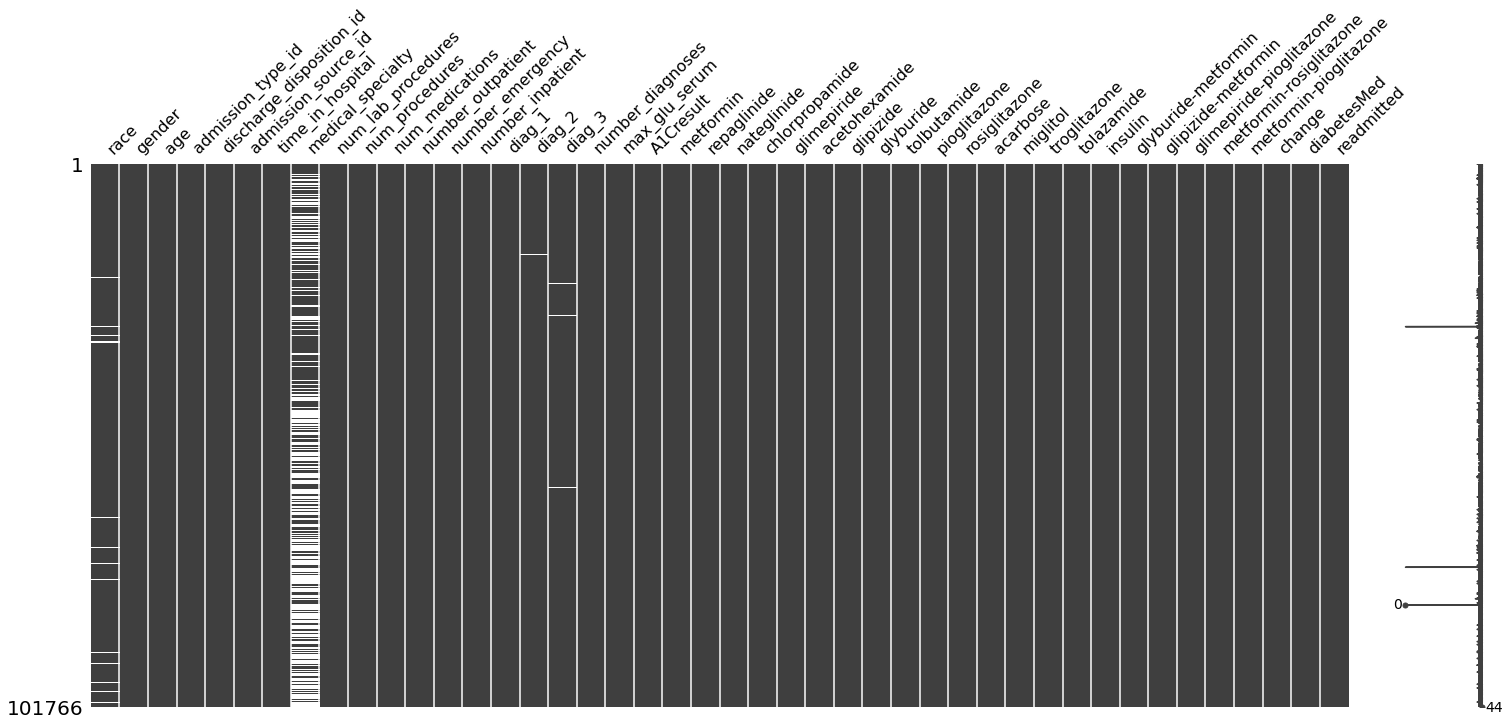

In [10]:
msno.matrix(data)

In [11]:
# medical_specialty has so many missing values, drop it
data.drop(columns=['medical_specialty'],inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 43 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   race                      99492 non-null   object  
 1   gender                    101763 non-null  category
 2   age                       101763 non-null  object  
 3   admission_type_id         101763 non-null  float64 
 4   discharge_disposition_id  101763 non-null  float64 
 5   admission_source_id       101763 non-null  float64 
 6   time_in_hospital          101763 non-null  float64 
 7   num_lab_procedures        101763 non-null  float64 
 8   num_procedures            101763 non-null  float64 
 9   num_medications           101763 non-null  float64 
 10  number_outpatient         101763 non-null  float64 
 11  number_emergency          101763 non-null  float64 
 12  number_inpatient          101763 non-null  float64 
 13  diag_1                    101

In [13]:
#data = data.astype({'race':'category','age':'category','time_in_hospital':'int','num_lab_procedures':'int'},errors='coerse')

data['max_glu_serum'].value_counts()

None    96417
Norm     2597
>200     1485
>300     1264
Name: max_glu_serum, dtype: int64

In [14]:
data['diag_1'] = pd.to_numeric(data['diag_1'],errors='coerce')
data['diag_2'] = pd.to_numeric(data['diag_2'],errors='coerce')
data['diag_3'] = pd.to_numeric(data['diag_3'],errors='coerce')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 43 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   race                      99492 non-null   object  
 1   gender                    101763 non-null  category
 2   age                       101763 non-null  object  
 3   admission_type_id         101763 non-null  float64 
 4   discharge_disposition_id  101763 non-null  float64 
 5   admission_source_id       101763 non-null  float64 
 6   time_in_hospital          101763 non-null  float64 
 7   num_lab_procedures        101763 non-null  float64 
 8   num_procedures            101763 non-null  float64 
 9   num_medications           101763 non-null  float64 
 10  number_outpatient         101763 non-null  float64 
 11  number_emergency          101763 non-null  float64 
 12  number_inpatient          101763 non-null  float64 
 13  diag_1                    100

In [16]:
list1=list(range(0,17))
list1.append(42)
data1 = data.iloc[:,list1]
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   race                      99492 non-null   object  
 1   gender                    101763 non-null  category
 2   age                       101763 non-null  object  
 3   admission_type_id         101763 non-null  float64 
 4   discharge_disposition_id  101763 non-null  float64 
 5   admission_source_id       101763 non-null  float64 
 6   time_in_hospital          101763 non-null  float64 
 7   num_lab_procedures        101763 non-null  float64 
 8   num_procedures            101763 non-null  float64 
 9   num_medications           101763 non-null  float64 
 10  number_outpatient         101763 non-null  float64 
 11  number_emergency          101763 non-null  float64 
 12  number_inpatient          101763 non-null  float64 
 13  diag_1                    100

In [17]:
data1 = data1.astype({'readmitted':'category','discharge_disposition_id':'category','admission_source_id':'category','race':'category','age':'category','admission_type_id':'category',},errors='ignore')
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   race                      99492 non-null   category
 1   gender                    101763 non-null  category
 2   age                       101763 non-null  category
 3   admission_type_id         101763 non-null  category
 4   discharge_disposition_id  101763 non-null  category
 5   admission_source_id       101763 non-null  category
 6   time_in_hospital          101763 non-null  float64 
 7   num_lab_procedures        101763 non-null  float64 
 8   num_procedures            101763 non-null  float64 
 9   num_medications           101763 non-null  float64 
 10  number_outpatient         101763 non-null  float64 
 11  number_emergency          101763 non-null  float64 
 12  number_inpatient          101763 non-null  float64 
 13  diag_1                    100

In [18]:
data1_scaled=scale(data1.iloc[:,range(5,17)])
data1_scaled

array([[-1.16987056, -1.1376649 , -0.10653126, ...,         nan,
                nan, -3.32165625],
       [ 0.30647481, -0.46766561,  0.80837608, ..., -1.05457282,
        -0.92022898,  0.81577228],
       [ 0.30647481, -0.80266526, -1.63137683, ..., -1.05462872,
                nan, -0.73576342],
       ...,
       [ 0.30647481, -1.1376649 ,  0.50340697, ...,  0.84593492,
        -0.68900912,  2.88448655],
       [ 0.30647481,  1.87733193,  0.09678148, ..., -0.85898246,
         3.26992616,  0.81577228],
       [ 0.30647481,  0.53733334, -1.52972045, ...,  0.51054134,
         2.07998977,  0.81577228]])

In [19]:
data1_scaled_df = pd.DataFrame(data1_scaled,columns=data1.iloc[:,range(5,17)].columns)
data1_scaled_df = data1_scaled_df[~data1_scaled_df.isna().any(axis=1)]
data1_scaled_df.head()

,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses
1,0.306475,-0.467666,0.808376,-0.785382,0.243390,-0.291466,-0.212623,-0.503285,-1.052563,-1.054573,-0.920229,0.815772
3,0.306475,-0.802665,0.045953,-0.199141,-0.002687,-0.291466,-0.212623,-0.503285,-2.349054,-1.052225,-0.085582,-0.218585
4,0.306475,-1.137665,0.401751,-0.785382,-0.986993,-0.291466,-0.212623,-0.503285,-1.434738,-1.574489,-0.948427,-1.252942
5,-0.923813,-0.467666,-0.614813,2.732063,-0.002687,-0.291466,-0.212623,-0.503285,-0.384967,-0.154656,-0.948427,0.815772
7,0.306475,0.202334,1.519971,-0.785382,-0.494840,-0.291466,-0.212623,-0.503285,-0.317240,0.298125,-0.948427,0.298594


In [20]:
data1_scaled_df.std(ddof=0)

admission_source_id    0.998941
time_in_hospital       0.994772
num_lab_procedures     1.002510
num_procedures         1.014598
num_medications        1.008231
number_outpatient      1.014605
number_emergency       1.013234
number_inpatient       0.989627
diag_1                 0.979934
diag_2                 0.987482
diag_3                 0.999426
number_diagnoses       0.947263
dtype: float64

In [21]:
pcaa=PCA().fit(data1_scaled_df)

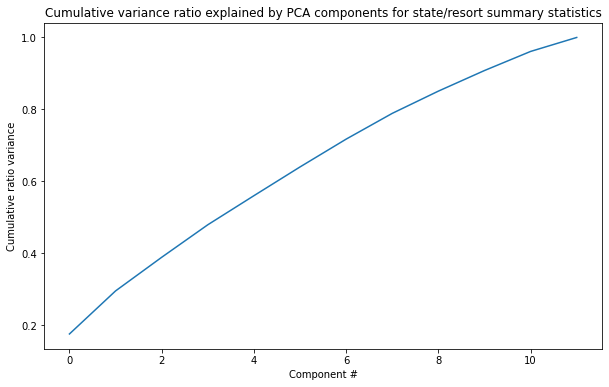

In [24]:
plt.subplots(figsize=(10, 6))
plt.plot(pcaa.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for state/resort summary statistics');

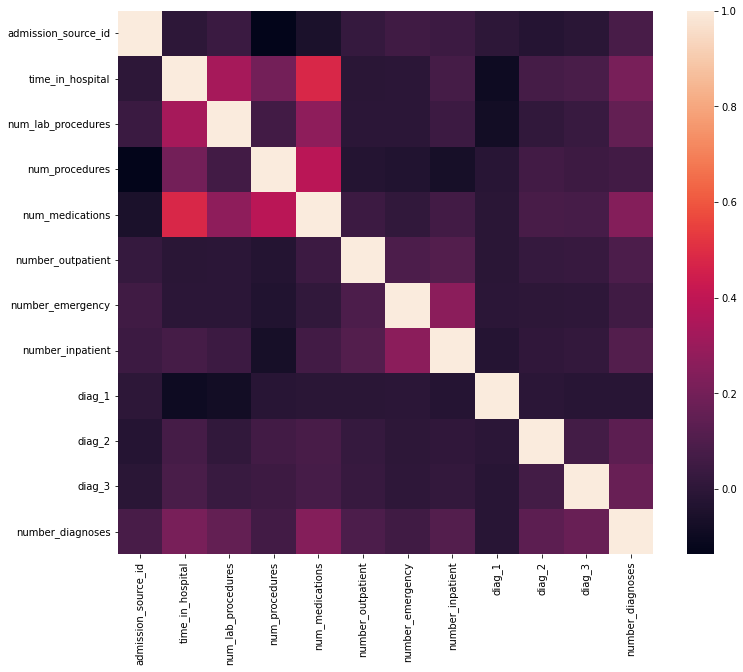

In [25]:
plt.subplots(figsize=(12,10))
sns.heatmap(data1_scaled_df.corr());